### Techniques for Feature Selection and Parameter Optimization

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn import metrics
from sklearn import tree

In [2]:
url = "http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/titanic-trimmed.csv"
titanic = pd.read_csv(url)
titanic.head(5)

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1st,1,female,29.0,0,0,211.337494,Southampton
1,2,1st,1,male,NaN,1,2,151.550003,Southampton
2,3,1st,0,female,2.0,1,2,151.550003,Southampton
3,4,1st,0,male,30.0,1,2,151.550003,Southampton
4,5,1st,0,female,25.0,1,2,151.550003,Southampton


In [3]:
titanic.describe(include = "all")

,pid,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309,1309.000000,1309,1045.000000,1309.000000,1309.000000,1308.000000,1307
unique,NaN,3,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,3rd,NaN,male,NaN,NaN,NaN,NaN,Southampton
freq,NaN,709,NaN,843,NaN,NaN,NaN,NaN,914
mean,655.000000,NaN,0.381971,NaN,29.908852,0.498854,0.385027,33.295479,NaN
std,378.020061,NaN,0.486055,NaN,14.392485,1.041658,0.865560,51.758669,NaN
min,1.000000,NaN,0.000000,NaN,0.166700,0.000000,0.000000,0.000000,NaN
25%,328.000000,NaN,0.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,655.000000,NaN,0.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,982.000000,NaN,1.000000,NaN,39.000000,1.000000,0.000000,31.275000,NaN


Data Preprocessing

In [4]:
display(titanic.shape)
titanic[titanic.age.isnull()].shape

(1309, 9)

(264, 9)

In [5]:
# Fill missing values
age_mean = titanic.age.mean()
titanic['age'] = titanic['age'].fillna(age_mean)
titanic.dropna(axis = 0, inplace = True)
titanic.shape

(1306, 9)

In [6]:
titanic.set_index('pid', drop = True, inplace = True)
titanic.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pid,,,,,,,,
1,1st,1,female,29.000000,0,0,211.337494,Southampton
2,1st,1,male,29.908852,1,2,151.550003,Southampton
3,1st,0,female,2.000000,1,2,151.550003,Southampton
4,1st,0,male,30.000000,1,2,151.550003,Southampton
5,1st,0,female,25.000000,1,2,151.550003,Southampton


In [7]:
# Convert categorical variables to dummy variables
titanic_ssf = pd.get_dummies(titanic)
titanic_ssf.head(5)

,survived,age,sibsp,parch,fare,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
pid,,,,,,,,,,,,,
1,1,29.000000,0,0,211.337494,True,False,False,True,False,False,False,True
2,1,29.908852,1,2,151.550003,True,False,False,False,True,False,False,True
3,0,2.000000,1,2,151.550003,True,False,False,True,False,False,False,True
4,0,30.000000,1,2,151.550003,True,False,False,False,True,False,False,True
5,0,25.000000,1,2,151.550003,True,False,False,True,False,False,False,True


In [8]:
titanic_names = titanic_ssf.columns.values
X = titanic_ssf[titanic_names[1:]]
y = titanic_ssf['survived']

In [9]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

Decision Tree without Feature Selection

In [10]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize the Decision Tree Classifier
dt = dt.fit(X_train, y_train) # Fit the model

In [11]:
def measure_performance(X, y, clf, show_accuracy = True, show_classification_report = True, show_confussion_matrix = True):

    y_pred = clf.predict(X)   
    
    if show_accuracy:
        print("Accuracy")
        print(format(metrics.accuracy_score(y, y_pred)))
        print()
        
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred))
        print()
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred))
        print()

In [12]:
# Call the function
measure_performance(X_test, y_test, dt)

Accuracy
0.7366412213740458

Classification report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       161
           1       0.66      0.64      0.65       101

    accuracy                           0.74       262
   macro avg       0.72      0.72      0.72       262
weighted avg       0.74      0.74      0.74       262


Confussion matrix
[[128  33]
 [ 36  65]]



Decision Tree with Feature Selection

In [13]:
# Initialize feature selection method
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = 30)

# Fit and transform the training data to select features
X_train_fs = fs.fit_transform(X_train, y_train)

# Transform the testing data
X_test_fs = fs.transform(X_test)

In [14]:
# Check if the feature was selected by the feature selection
for i in range(len(X.columns.values)):
    
    if fs.get_support()[i]:
        print("%10s  %3.2f" % (X.columns.values[i], fs.scores_[i]))

      fare  5185.44
pclass_1st  61.98
sex_female  189.10
  sex_male  102.94


In [15]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize the Decision Tree Classifier
dt = dt.fit(X_train_fs, y_train) # Fit the model

In [16]:
# Call the function
measure_performance(X_test_fs, y_test, dt)

Accuracy
0.8206106870229007

Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.76      0.78      0.77       101

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262


Confussion matrix
[[136  25]
 [ 22  79]]



Feature Selection - Finding the Best Percentile using Cross-validation

In [17]:
percentiles = range(1, 100, 5)
results = []

for i in range(1, 100, 5):

    # Initialize feature selection method
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = i)
    
    # Fit and transform the training data to select features
    X_train_fs = fs.fit_transform(X_train, y_train)

    # Perform 5-fold cross-validation
    scores = cross_val_score(dt, X_train_fs, y_train, cv = 5)

    # Append the mean cross-validation score
    results = np.append(results, scores.mean())

    print("%2d  %0.4f" % (i, scores.mean()))

 1  0.7012
 6  0.7012
11  0.7615
16  0.7615
21  0.7615
26  0.7615
31  0.7586
36  0.7586
41  0.7672
46  0.7643
51  0.7643
56  0.7586
61  0.7576
66  0.7490
71  0.7500
76  0.7529
81  0.7567


86  0.7586
91  0.7615
96  0.7510


In [18]:
optimal_percentile_ind = np.where(results == results.max())[0][0] # Identify the index of the optimal percentile of features
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(X.columns)/100) # Calculate the optimal number of features

print("Optimal Percentile of Features:{0}".format(percentiles[optimal_percentile_ind]))
print("Optimal Number of Features:{0}".format(optimal_num_features))

Optimal Percentile of Features:41
Optimal Number of Features:4


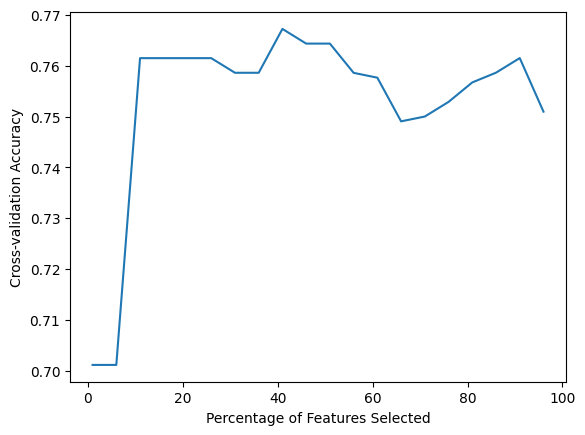

In [19]:
# Create a plot
pl.figure()
pl.xlabel("Percentage of Features Selected")
pl.ylabel("Cross-validation Accuracy")
pl.plot(percentiles, results)

Evaluate the Best Number of Features

In [20]:
# Initialize feature selection method
fs = feature_selection.SelectKBest(feature_selection.chi2, k = optimal_num_features)

# Fit and transform the training data to select features
X_train_fs = fs.fit_transform(X_train, y_train)

# Transform the testing data
X_test_fs = fs.transform(X_test)

In [21]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize the Decision Tree Classifier
dt = dt.fit(X_train_fs, y_train) # Fit the model

In [22]:
# Call the function
measure_performance(X_test_fs, y_test, dt)

Accuracy
0.8206106870229007

Classification report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       161
           1       0.76      0.78      0.77       101

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262


Confussion matrix
[[136  25]
 [ 22  79]]



Model selection 1 - Criterion

In [23]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize a Classifier
scores = cross_val_score(dt, X_train, y_train, cv = 5) # Perform 5-fold cross-validation
print("Entropy Criterion Accuracy on CV: {0:.3f}".format(scores.mean()))

dt = tree.DecisionTreeClassifier(criterion = 'gini') # Initialize a Classifier
scores = cross_val_score(dt, X_train, y_train, cv = 5) # Perform 5-fold cross-validation
print("Gini Criterion Accuracy on CV: {0:.3f}".format(scores.mean()))

Entropy Criterion Accuracy on CV: 0.744
Gini Criterion Accuracy on CV: 0.743


In [24]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize a Classifier
dt.fit(X_train, y_train) # Fit the model

DecisionTreeClassifier(criterion='entropy')

In [25]:
# Call the function
measure_performance(X_test, y_test, dt)

Accuracy
0.7480916030534351

Classification report
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       161
           1       0.68      0.66      0.67       101

    accuracy                           0.75       262
   macro avg       0.73      0.73      0.73       262
weighted avg       0.75      0.75      0.75       262


Confussion matrix
[[129  32]
 [ 34  67]]



Model selection 2 - Max Depth

In [26]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize a Classifier
dt.set_params(max_depth = 5) # Set the maximum depth
dt.fit(X_train, y_train) # Fit the model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
# Call the function
measure_performance(X_test, y_test, dt)

Accuracy
0.7900763358778626

Classification report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       161
           1       0.74      0.69      0.72       101

    accuracy                           0.79       262
   macro avg       0.78      0.77      0.78       262
weighted avg       0.79      0.79      0.79       262


Confussion matrix
[[137  24]
 [ 31  70]]



Model selection 3 - Max Depth with Cross Validation

In [28]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to arrays
    X = np.array(X)
    y = np.array(y)

    # Initialize arrays to store training and testing scores
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    for i, param_value in enumerate(param_values):
        
        # Set the classifier's parameter to the current value
        clf.set_params(**{param_name:param_value})
        
        # Initialize arrays to store accuracy scores for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # Create a K-Fold cross-validation object
        cv = KFold(n_splits = K, shuffle = True, random_state = 0)

        j = 0

        for train, test in cv.split(X):
            
            # Fit the classifier
            clf.fit(X[train], y[train])

            # Evaluate accuracy on both sets
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])

            j += 1
            
        # Store the mean accuracy scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # Create a plot
    plt.plot(param_values, train_scores, label = 'Train', alpha = 0.4, lw = 2, c = 'b')
    plt.plot(param_values, test_scores, label = 'Test', alpha = 0.4, lw = 2, c = 'g')
    plt.legend(loc = 7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Cross-Validation Accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [29]:
# Generate an array of values for the maximum depth of the decision tree
md = np.linspace(1, 40, 20)
md = np.array([int(e) for e in md])

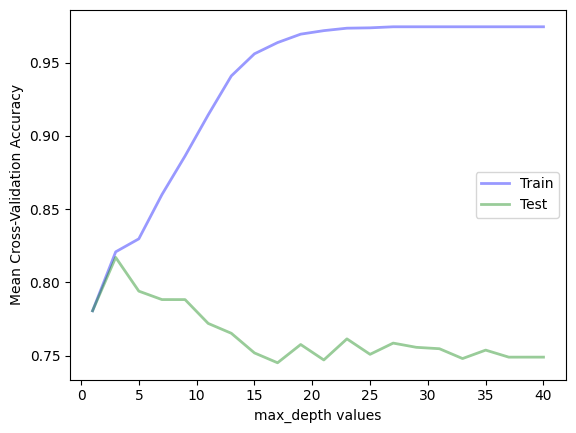

In [30]:
# Call the function
train_scores, test_scores = calc_params(X_train, y_train, dt, md, 'max_depth', 5)

In [31]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize a Classifier
dt.set_params(max_depth = 3) # Set the maximum depth
dt.fit(X_train, y_train) # Fit the model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
measure_performance(X_test, y_test, dt)

Accuracy
0.7977099236641222

Classification report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       161
           1       0.75      0.71      0.73       101

    accuracy                           0.80       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.80      0.80      0.80       262


Confussion matrix
[[137  24]
 [ 29  72]]



Model selection 4 - Min Samples Leaf

In [33]:
# Generate an array of values for the minimum samples leaf of the decision tree
msl = np.linspace(1, 30, 15)
msl = np.array([int(e) for e in msl])

In [34]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize a Classifier

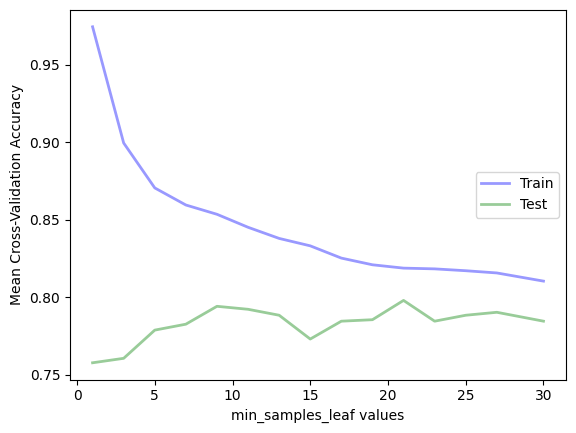

In [35]:
# Call the function
train_scores, test_scores = calc_params(X_train, y_train, dt, msl, 'min_samples_leaf', 5)

Model selection 5 - Combination of Optimal Parameters

In [36]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize a Classifier
dt.set_params(min_samples_leaf = 21, max_depth = 3) # Set the parameters
dt.fit(X_train, y_train) # Fit the model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=21)

In [37]:
# Call the function
measure_performance(X_test, y_test, dt)

Accuracy
0.7786259541984732

Classification report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       161
           1       0.71      0.71      0.71       101

    accuracy                           0.78       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262


Confussion matrix
[[132  29]
 [ 29  72]]



Grid Search

In [38]:
dt = tree.DecisionTreeClassifier() # Initialize a Classifier

In [39]:
# Define a parameter grid for hyperparameter tuning using GridSearchCV
parameters = {'criterion': ['entropy', 'gini'],
              'max_depth': np.linspace(1, 20, 10, dtype = int),
              'min_samples_leaf': np.linspace(1, 30, 15, dtype = int),
              'min_samples_split': np.linspace(2, 20, 10, dtype = int)}

In [40]:
gs = GridSearchCV(dt, parameters, verbose = 1, cv = 5) # Create a GridSearchCV object
gs.fit(X_train, y_train) # Fit the GridSearchCV object

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 20]),
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])},
             verbose=1)

In [41]:
best_parameters = gs.best_params_ # Best parameter combination that maximized the score
best_score = gs.best_score_ # Best mean cross-validation score achieved with the best parameters

best_parameters, best_score

({'criterion': 'entropy',
  'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.8122285609127715)

In [42]:
dt = tree.DecisionTreeClassifier(criterion = 'entropy') # Initialize a Classifier
dt.set_params(max_depth = 3, min_samples_leaf = 1, min_samples_split = 2) # Set the parameters
dt.fit(X_train, y_train) # Fit the model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
# Call the function
measure_performance(X_test, y_test, dt)

Accuracy
0.7977099236641222

Classification report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       161
           1       0.75      0.71      0.73       101

    accuracy                           0.80       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.80      0.80      0.80       262


Confussion matrix
[[137  24]
 [ 29  72]]

